# How neural net works dumbed down

About: As I'm learning how neural networks and transformers work, this is my attempt to crystallize my understanding with toy examples of different concepts

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from PIL import Image, ImageSequence

%matplotlib inline

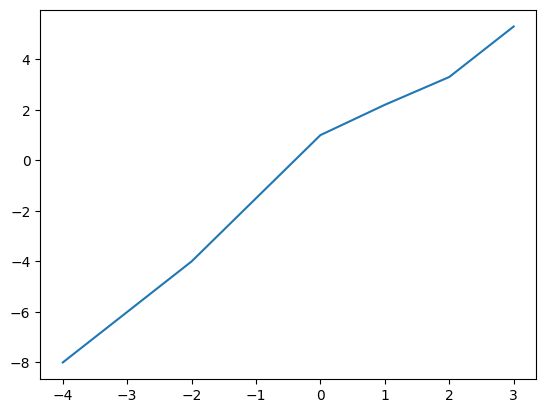

In [2]:
x = [-4, -2, 0,1,2,3]
y = [-8,-4, 1, 2.2, 3.3, 5.3]
plt.plot(x, y)

# y = m*x + b
Looking for m ~ 2 and b ~ 0

In [32]:
# initialize 
random.seed(123)
m = random.random()
random.seed(456)
b = random.random()
m = 100
b = -3
print(f'{m=}')
print(f'{b=}')

m=100
b=-3


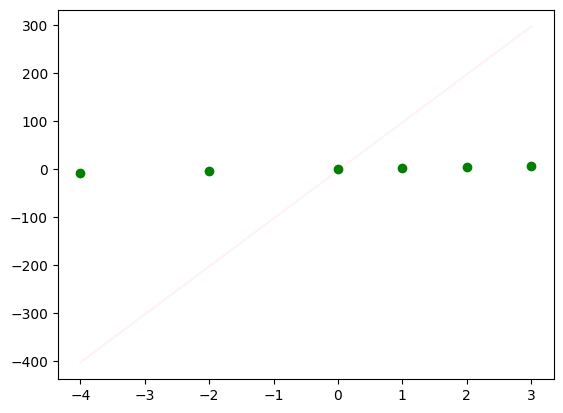

In [33]:
losses = []
passes = 0
frames = []
fig, ax = plt.subplots()
ax.plot(x, y, 'og')
y_pred = [xi * m + b for xi in x]
ax.plot(x, y_pred, 'r', alpha = 0.05)
fig
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
frames.append(Image.fromarray(image))

In [51]:
# forward pass

for _ in range(1):
    passes +=1
    for i in range(len(x)):

        #forward pass
        out = m * x[i] + b
        
        #loss
        loss = out - y[i]
        losses.append(loss)
        
        # backward pass
        step_size = 0.01
        #calc gradients with derivatives 
        # y_grad == loss
        # for rest you chain rule with their own gradient
        b_grad = 1 * loss # dy/db = 1
        # b_grad_calc = ((m*x + b+h) -  (m*x + b)) / h 
                    # =  (m*x - m*x +b-b +h) / h
                    # =   h / h = 1
        m_grad = x[i] * loss # dy/dm = x
        # m_grad_calc = (((m+h)x + b) - (mx + b)) / h
                    # = (mx +hx +b -mx - b ) / h
                    # = hx / x = x
        
        #update m and b
        m -= m_grad * step_size
        b -= b_grad * step_size
        # print(f'{x[i]=} {y[i]=}')
        # print(f'{out=}')
print(f'{loss=}')
print(f'{m=}')
print(f'{b=}')
y_pred = [xi * m + b for xi in x]
ax.plot(x, y_pred, 'r', alpha = 1 - np.exp(-0.05 * passes))
fig
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
frames.append(Image.fromarray(image))

loss=0.868058630459366
m=2.0376668193086904
b=-0.03174769051264208


In [52]:
frames[0].save('sgd_line3.gif',
               save_all=True, append_images=frames[1:], optimize=False, duration=100, loop=0)

In [53]:
<img src="sgd_line2.gif" width="250" align="center">

SyntaxError: invalid syntax (1475415826.py, line 1)

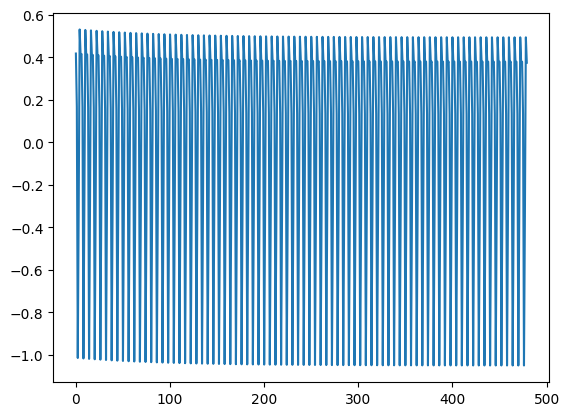

In [352]:
plt.plot(losses)